<a href="https://colab.research.google.com/github/Kiran-Venkatesh/KV/blob/master/DV_tutorial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_excel('Circles.xlsx')
df.head()

,circle0,circle1,circle2,circle3,circle4,circle5,circle6,circle7,circle8,circle9,circle10,circle11,circle12,circle13,circle14,circle15,circle16,circle17,circle18,circle19,circle20,circle21,circle22,circle23
0,71.0,173.0,155.0,51.0,125.0,23.0,337.0,225.0,282.0,336.0,42.0,324.0,278.0,138.0,175.0,108,251.0,90.0,177.0,93.0,244.0,12.0,267.0,28.0
1,215.0,NaN,99.0,83.0,344.0,NaN,289.0,46.0,NaN,204.0,14.0,265.0,NaN,131.0,227.0,208,94.0,52.0,NaN,33.0,282.0,NaN,NaN,149.0
2,54.0,NaN,327.0,237.0,295.0,NaN,93.0,NaN,NaN,74.0,216.0,54.0,NaN,68.0,NaN,251,330.0,172.0,NaN,333.0,262.0,NaN,NaN,162.0
3,61.0,NaN,140.0,NaN,257.0,NaN,17.0,NaN,NaN,206.0,2.0,161.0,NaN,143.0,NaN,125,5.0,126.0,NaN,17.0,293.0,NaN,NaN,NaN
4,298.0,NaN,116.0,NaN,55.0,NaN,111.0,NaN,NaN,292.0,NaN,298.0,NaN,86.0,NaN,325,34.0,294.0,NaN,137.0,220.0,NaN,NaN,NaN


In [ ]:
edges=pd.read_excel('Edges.xlsx')
edges


,From,To
0,236,186
1,122,285
2,24,346
3,271,304
4,176,9
...,...,...
5033,171,58
5034,326,20
5035,85,75
5036,98,332


3


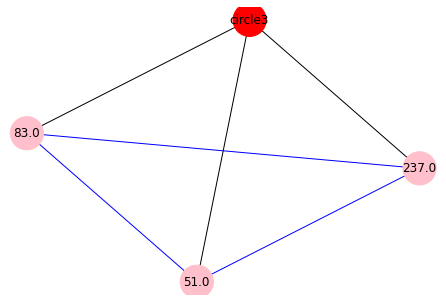

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from google.colab import files
select=str(random.randrange(0,23,1))
print(select)
#select='0'
Filter='circle'+select
# Build a dataframe with 4 connections
gf = pd.DataFrame({ 'From':[Filter]*len(list(df[Filter].dropna())), 'To':list(df[Filter].dropna())})
Edge_filter=[]
for i in range(len(edges)):
  if edges['From'][i] in list(df[Filter].dropna()) and edges['To'][i] in list(df[Filter].dropna()):
    Edge_filter.append([edges['From'][i],edges['To'][i]])
try:
  EF=pd.DataFrame(Edge_filter)
  EF.columns=['From','To']
  gf=gf.append(EF)
except:
  pass
#for i in range(1,24):
#  gf=gf.append(pd.DataFrame({ 'From':['circle'+str(i)]*len(list(df['circle'+str(i)].dropna())), 'To':list(df['circle'+str(i)].dropna())}))
G=nx.from_pandas_edgelist(gf, 'From', 'To')

# Plot it
edge_color_list=[]
for e in G.edges():
    if e[0]=='circle'+select:
      edge_color_list.append('black')
    else:
      edge_color_list.append('blue')

color_map = []
for node in G:
    if node=='circle'+select:
        color_map.append('Red')
    else: 
        color_map.append('pink')      
#nx.draw(G, node_color=color_map,edge_color=edge_color_list, with_labels=True)
pos=nx.spring_layout(G)
nx.draw(G, pos=pos, node_size = 1100,edge_color=edge_color_list, node_color=color_map)
nx.draw_networkx_labels(G, pos=pos)
  
#plt.savefig("circle"+select+".png")
#files.download("circle"+select+".png") 

plt.show()

 
# Build your graph



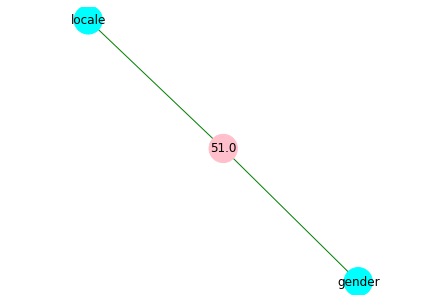

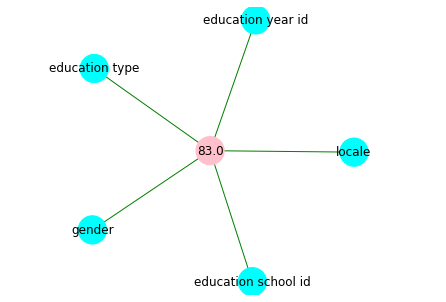

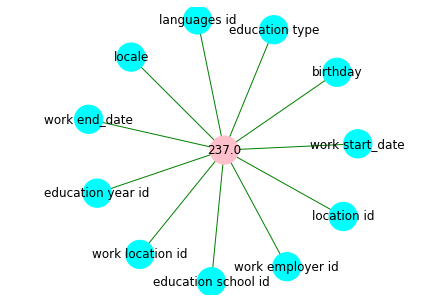

In [ ]:
ftf=pd.read_excel('Features.xlsx')
ftf.head()
fname=pd.read_excel('Feature_Info.xlsx')
fname.head()
node_ids=list(df[Filter].dropna())
for j in node_ids:
  feat_value=[i for i in list(ftf.columns[1:]) if ftf[i].loc[j-1]==1]
  feat_name=list(fname.loc[feat_value]['Feature_Name'])
  nf = pd.DataFrame({ 'From':[j]*len(feat_value), 'To':feat_name})
  nf.head()
  G=nx.from_pandas_edgelist(nf, 'From', 'To')
  color_map = []
  for node in G:
      if node==j:
          color_map.append('pink')
      else: 
          color_map.append('cyan')  

  pos=nx.spring_layout(G)
  nx.draw(G, pos=pos, node_size = 800,edge_color='green', node_color=color_map)
  nx.draw_networkx_labels(G, pos=pos)
  l,r = plt.xlim()
  plt.xlim(l-0.5,r+0.5)
  #nx.draw(G,node_color=color_map,edge_color='green',with_labels=True)
  #plt.savefig(str(j)+".png")
  #files.download(str(j)+".png") 


  plt.show()


In [ ]:
ftf.loc[53][50:100]

49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
58    0
59    0
60    0
61    0
62    0
63    0
64    0
65    0
66    0
67    0
68    0
69    0
70    0
71    0
72    0
73    0
74    0
75    0
76    0
77    0
78    1
79    0
80    0
81    0
82    0
83    0
84    0
85    0
86    0
87    0
88    0
89    0
90    0
91    0
92    1
93    0
94    0
95    0
96    0
97    0
98    0
Name: 53, dtype: int64

In [ ]:
fname.loc[100]

Feature_ID               100
Feature_Name    languages id
Name: 100, dtype: object

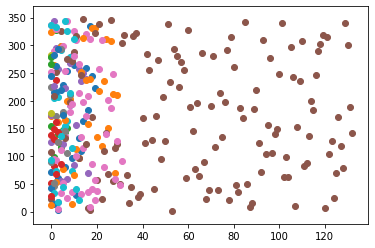

In [ ]:
import matplotlib.pylab as plt
for i in df.columns:
  plt.scatter(list(df.index),df[i])

In [ ]:
df.columns

Index(['circle0', 'circle1', 'circle2', 'circle3', 'circle4', 'circle5',
       'circle6', 'circle7', 'circle8', 'circle9', 'circle10', 'circle11',
       'circle12', 'circle13', 'circle14', 'circle15', 'circle16', 'circle17',
       'circle18', 'circle19', 'circle20', 'circle21', 'circle22', 'circle23'],
      dtype='object')